In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data\tarjeta-de-credito-analisis-de-costos-interes-nominal-y-anualidad-noviembre-2024.csv', 
                 delimiter=';',
                 encoding='latin-1'
                 )

In [3]:
print('first rows\n')
print(df.head())
print('\nDataset Information\n')
print(df.info())
print('\nSummary Statistics\n')
print(df.describe())


first rows

   Entidad Crediticia  Mes de Registro    Tipo de Tarjeta  \
0  BANCO ALIADO, S.A.            45323          Visa Gold   
1  BANCO ALIADO, S.A.            45323      Visa Platinum   
2  BANCO ALIADO, S.A.            45323      Visa Infinite   
3  BANCO ALIADO, S.A.            45323  Visa Corporate      
4  BANCO ALIADO, S.A.            45323      Visa Prepago    

  Membres¡a Anual Tarjeta principal Membres¡a Anual Tarjeta Adicional  \
0                                70                                20   
1                                90                                25   
2                               120                                30   
3                               100                               100   
4                                25                                25   

  Cargo por Perdida o Robada (B/.) Cargo por Deterioro (B/.)  \
0                               20                    Gratis   
1                               20                    

In [4]:
df['Mes de Registro'].unique()

array([45323, 45413, 45505, 45597], dtype=int64)

In [5]:
# changing date format from excel
def convert_excel_date(df, column='Mes de Registro'):
    df[column] = pd.to_datetime(df[column], origin='1899-12-30', unit='D')

In [6]:
df.columns

Index(['Entidad Crediticia', 'Mes de Registro', 'Tipo de Tarjeta',
       'Membres¡a Anual Tarjeta principal',
       'Membres¡a Anual Tarjeta Adicional', 'Cargo por Perdida o Robada (B/.)',
       'Cargo por Deterioro (B/.)',
       'Tasa de inters                                                                                                                                                                                                                                                                                                   Nominal Anual (%)',
       'L¡mite de Crdito Inferior (B/.)', 'L¡mite de Crdito Superior',
       'Costo de Seguro Contra Fraude (B/.) ', 'Desgravamen', 'Fecha de Corte',
       'Fecha de Pago',
       'Pago                                                                                                                                                                                                                                                          

In [7]:
df['Membres¡a Anual Tarjeta principal'].unique()

array(['70', '90', '120', '100', '25', '40',
       '$7 por mes o sin cargo mensual si realiza 5 transacciones de compras al mes. ',
       '$60.00', '$ 7.00 mensuales',
       '$7 por mes o sin cargo mensual si realiza 7 transacciones de compras al mes. ',
       '$75.00', 'Gratis', '$ 95.00', '95', '10 trans ¢ B/.10.00',
       '$8 por mes o sin cargo mensual si realiza 7 transacciones de compras al mes. ',
       '$10 por mes o sin cargo mensual si realiza 10 transacciones de compras al mes. ',
       '$ 150.00', '175', '150', '$150.00', '300', '$ 250.00', '$ 60.00',
       '$75 m\xa0s ITBMS', '$90 m\xa0s ITBMS', '$125 m\xa0s ITBMS',
       '$40 m\xa0s ITBMS', '$125 m\xa0s  ITBMS', '$255 m\xa0s  ITBMS',
       '$90 m\x85s ITBMS', '$125 m\x85s ITBMS', '$165 m\x85s ITBMS',
       '$85.00 mas I.T.B.M.S.', '$25.00 mas I.T.B.M.S.',
       '$150.00 mas I.T.B.M.S.', '0', '$110.00 mas I.T.B.M.S.', '160',
       '110', '101', '80', '99', '65', '85', '78', '74', '170', '199',
       '187', '1

In [8]:
from category_encoders import HashingEncoder

# converting all data to strings
df = df.astype(str)

encoder = HashingEncoder(cols=['Membres¡a Anual Tarjeta principal',
                               'Membres¡a Anual Tarjeta Adicional', 'Cargo por Perdida o Robada (B/.)',
                               'Cargo por Deterioro (B/.)','Tasa de inters                                                                                                                                                                                                                                                                                                   Nominal Anual (%)',
                               'L¡mite de Crdito Inferior (B/.)', 'L¡mite de Crdito Superior',
                               'Costo de Seguro Contra Fraude (B/.) ', 'Desgravamen', 'Fecha de Corte',
                               'Fecha de Pago',
                               'Pago                                                                                                                                                                                                                                                                                                                                            M¡nimo Mensual (B/.)',
                               'Pagos                                                                                                                                                                                                                                                                                Atrasados (B/.)',
                               'Sobregiro (B/.)', 'Adelanto de Dinero en Efectivo (B/.)'],
                         n_components=6)
hashed_df = encoder.fit_transform(df)
print(hashed_df.head())


   col_0  col_1  col_2  col_3  col_4  col_5  Entidad Crediticia  \
0      2      0      4      0      3      6  BANCO ALIADO, S.A.   
1      3      1      4      2      3      2  BANCO ALIADO, S.A.   
2      3      0      5      2      1      4  BANCO ALIADO, S.A.   
3      3      1      3      2      2      4  BANCO ALIADO, S.A.   
4      1      1      3      1      9      0  BANCO ALIADO, S.A.   

  Mes de Registro    Tipo de Tarjeta  
0           45323          Visa Gold  
1           45323      Visa Platinum  
2           45323      Visa Infinite  
3           45323  Visa Corporate     
4           45323      Visa Prepago   


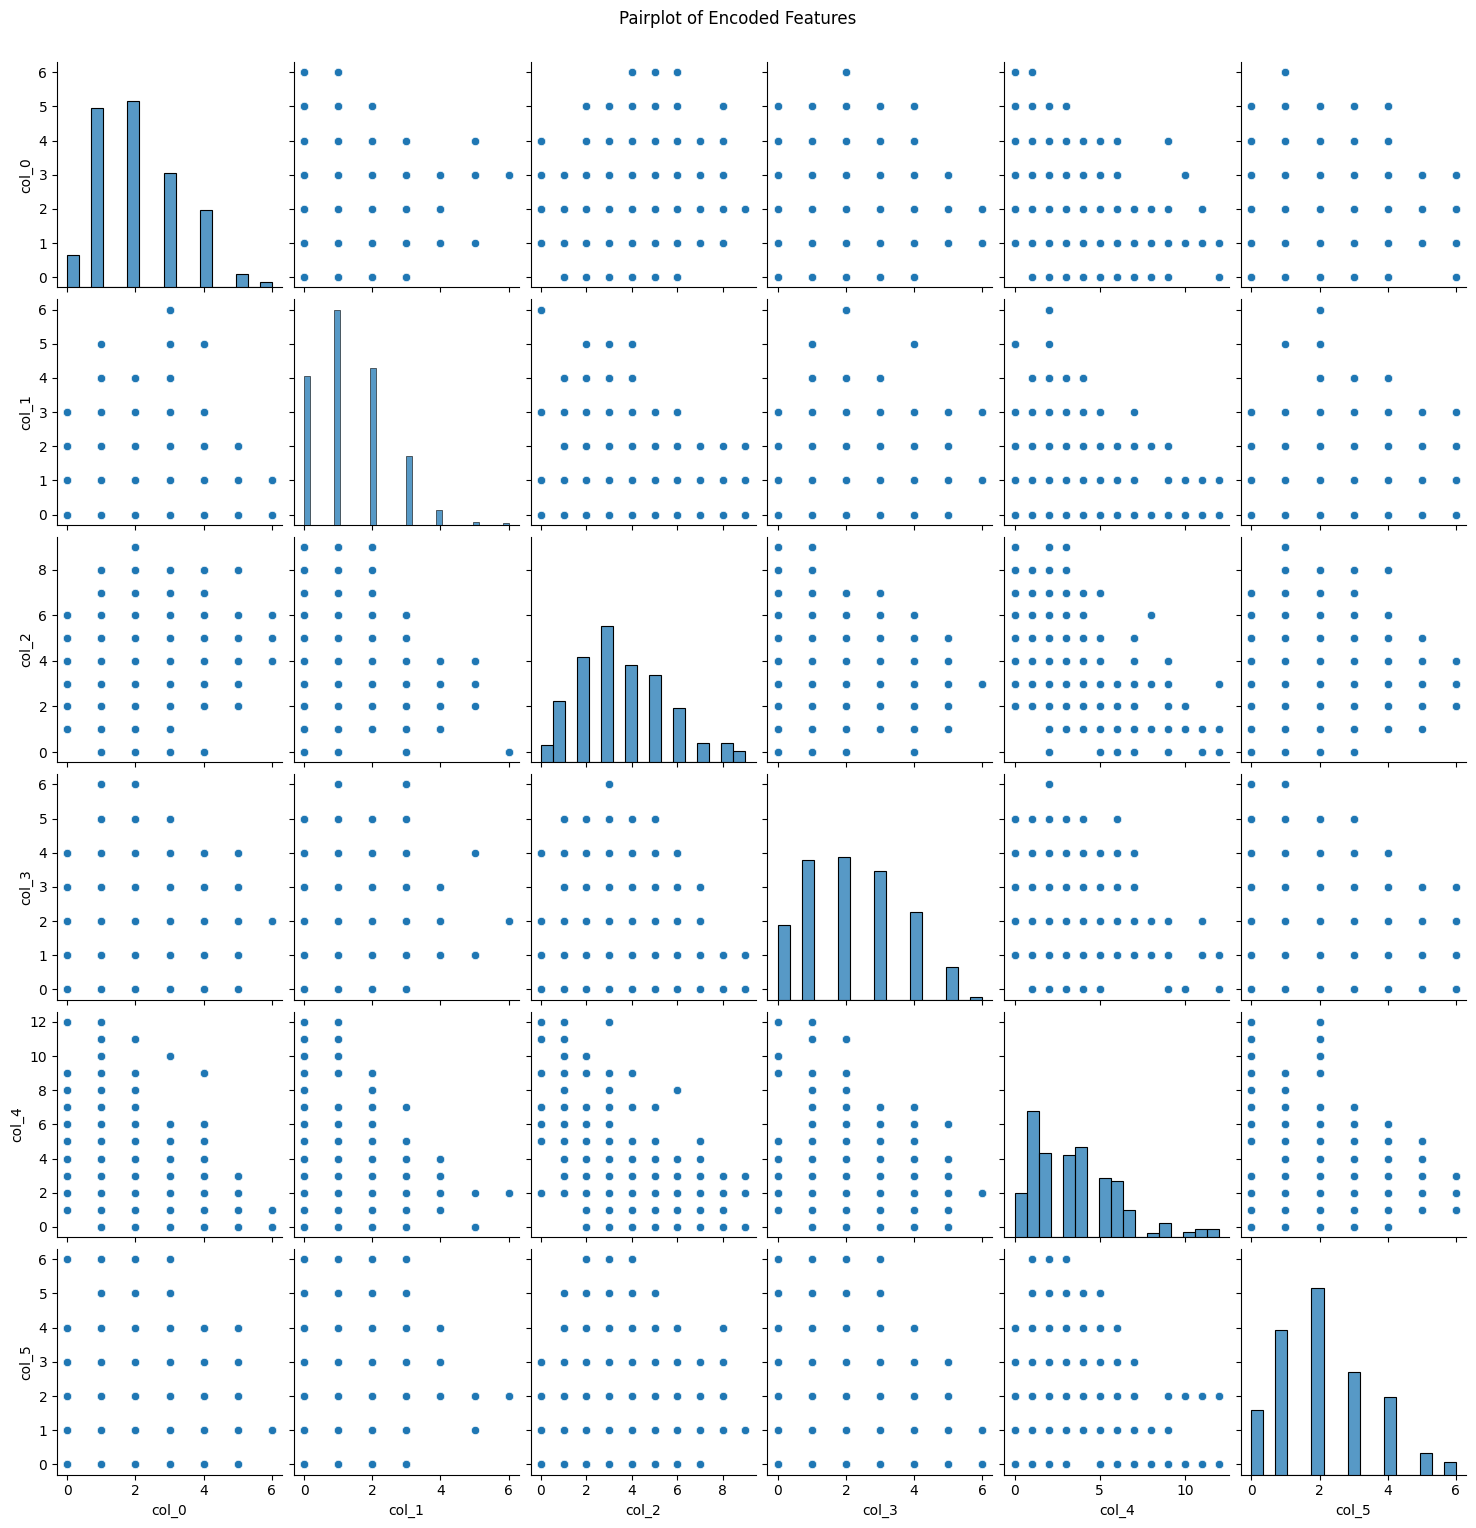

In [9]:
sns.pairplot(hashed_df)
plt.suptitle("Pairplot of Encoded Features", y=1.02)
plt.show()

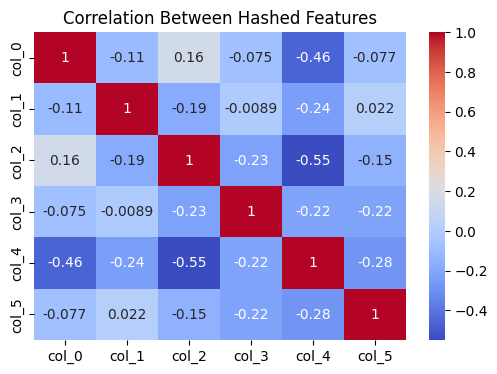

In [10]:
df_numeric = hashed_df.drop(columns=['Entidad Crediticia','Mes de Registro', 'Tipo de Tarjeta' ])

plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Hashed Features")
plt.show()

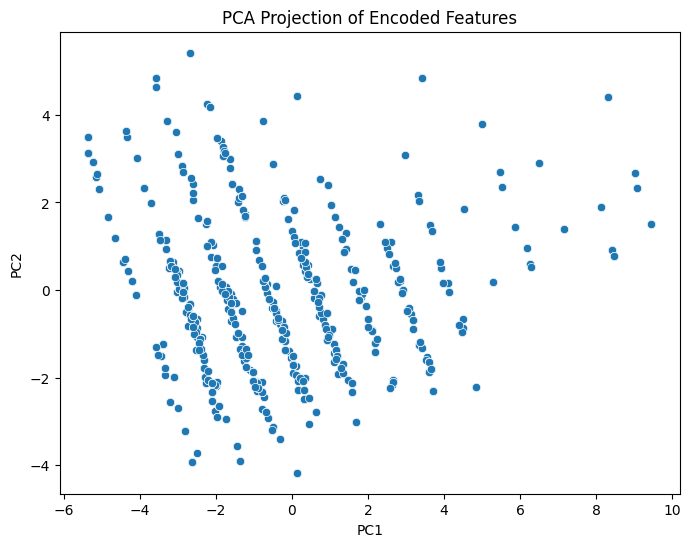

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])
plt.title("PCA Projection of Encoded Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline

# Define the anomaly detection pipeline (IsolationForest
X = df_numeric
pipeline = Pipeline([
    ('model', IsolationForest(random_state=42))
])

# Hyperparameter grid for IsolationForest
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_samples': ['auto', 0.8],
    'model__contamination': [0.05, 0.1],
    'model__max_features': [1.0]
}

In [13]:
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV to find best hyperparameters
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X)

# Best model from GridSearchCV
best_model = grid.best_estimator_

c:\Users\chima\repos\trabajo_final_intro_dm\venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\chima\repos\trabajo_final_intro_dm\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\chima\repos\trabajo_final_intro_dm\venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\chima\repos\trabajo_final_intro_dm\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1

In [14]:
# Predict anomalies (-1 = anomaly, 1 = normal)
hashed_df['anomaly'] = best_model.named_steps['model'].predict(X)  # -1 = anomaly, 1 = normal


In [15]:
df['anomaly'] = best_model.named_steps['model'].predict(X)

In [16]:
# PCA for dimensionality reduction (2D)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
hashed_df['PC1'] = pca_result[:, 0]
hashed_df['PC2'] = pca_result[:, 1]
hashed_df['PC3'] = pca_result[:, 2]

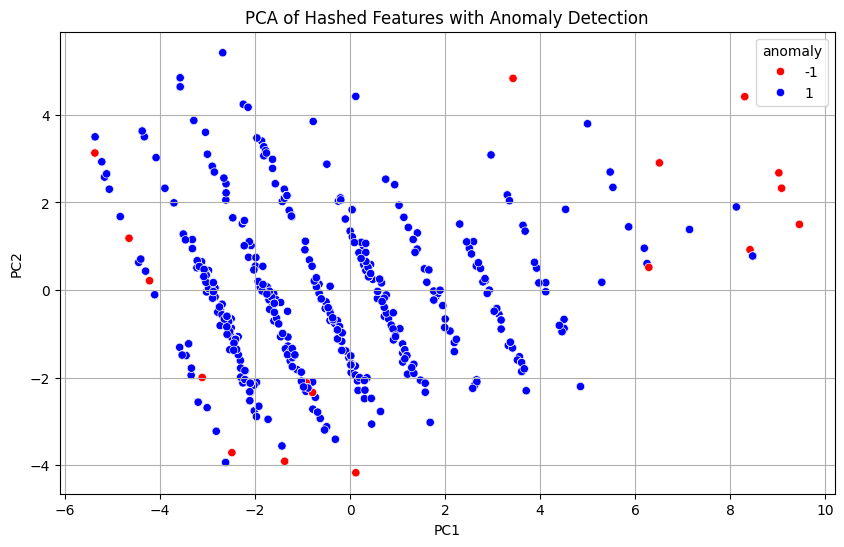

In [17]:
# Visualize PCA with anomaly detection results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hashed_df, x='PC1', y='PC2', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('PCA of Hashed Features with Anomaly Detection')
plt.grid(True)
plt.show()

In [18]:
df.to_csv(r'data\PRED_tarjeta-de-credito-analisis-de-costos-interes-nominal-y-anualidad-noviembre-2024.csv')

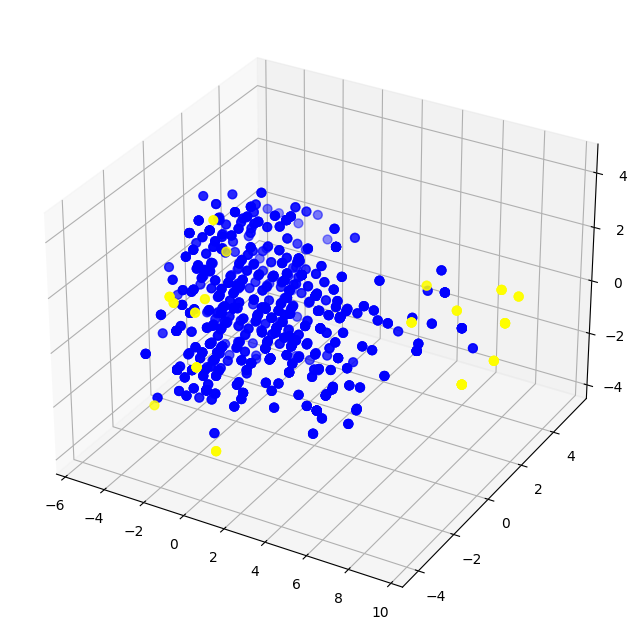

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# hyperplane
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

normal = hashed_df[hashed_df['anomaly'] == 1]
ax.scatter (normal['PC1'],normal['PC2'],normal['PC3'], c='blue', label = 'Normal', s=40)

anomalies = hashed_df[hashed_df['anomaly'] == -1]
ax.scatter (anomalies['PC1'],anomalies['PC2'],anomalies['PC3'], c='yellow', label = 'Normal', s=40)

plt.show()

In [20]:
import plotly.express as px

fig = px.scatter_3d(
    hashed_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color = hashed_df['anomaly'].map({1:'Normal', -1:'Anomaly'}),
    title= 'PCA Tarjetas de Credito Anomaly Detection'
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC1',
    zaxis_title='PC1',
))

fig.show()

In [21]:
hashed_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,Entidad Crediticia,Mes de Registro,Tipo de Tarjeta,anomaly,PC1,PC2,PC3
0,2,0,4,0,3,6,"BANCO ALIADO, S.A.",45323,Visa Gold,1,-0.742514,0.193664,4.195597
1,3,1,4,2,3,2,"BANCO ALIADO, S.A.",45323,Visa Platinum,1,-0.709365,0.280802,-0.060501
2,3,0,5,2,1,4,"BANCO ALIADO, S.A.",45323,Visa Infinite,1,-3.021658,-0.041875,1.280254
3,3,1,3,2,2,4,"BANCO ALIADO, S.A.",45323,Visa Corporate,1,-1.261923,-1.410152,1.485117
4,1,1,3,1,9,0,"BANCO ALIADO, S.A.",45323,Visa Prepago,1,5.477455,2.694349,-0.728805


In [22]:
hashed_df.to_csv(r'data\Hashed_PRED_tarjeta-de-credito-analisis-de-costos-interes-nominal-y-anualidad-noviembre-2024.csv')